# Read data from RDBMS
Often data is stored in a database. This example is uses Cockroach. Cockroach is scalable database that accepts sytax similar to PostgreSQL.

In [1]:
import re
import subprocess
from pandas import DataFrame
import seaborn as sns
import psycopg2

### Create a connection to CockroachDB
The host and port are determined by looking at the Endpoints for PG in the Cockroach Services Tab.

In [2]:
conn = psycopg2.connect(
    database='tx',
    user='test_user',
    port='26257',
    host='10.0.7.250' # Read this from Cockroach endpoint
)
conn.set_session(autocommit=True)
cur = conn.cursor()

### Fetch Data with SQL
Read data from Cockroach using SQL. Convert to a Pandas dataframe. Working with SQL to manipulate data is typically more scalable and simplier than manipulating data with Pandas directly.

In [3]:
cur.execute("""WITH k AS
(
    SELECT DATE_TRUNC('YEAR', launched) launched_year,
        backers, usd_pledged pledged,
        MAX(DATE_TRUNC('YEAR', launched)) OVER (PARTITION BY 1) mx_year
    FROM kickstart k
    WHERE state NOT IN ('live', 'undefined')
)
SELECT EXTRACT('year', launched_year) launched_year,
   SUM(backers) backers
FROM k
WHERE launched_year < mx_year
GROUP BY launched_year
ORDER BY launched_year

""")

df = DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()

,launched_year,backers
0,2009,43632
1,2010,405976
2,2011,1392885
3,2012,4340992
4,2013,6288172


### Simple plot
This is the simpliest of plots.

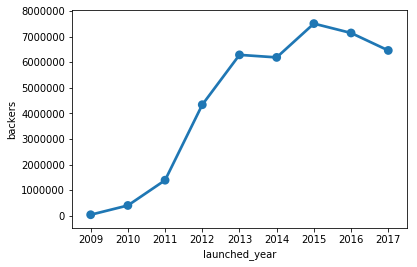

In [4]:
sns.pointplot(x="launched_year", y="backers", data=df)

### Jupyter vs Dedicated Dashboard

|     Feature                                         | Jupyter | Dedicated Dashboard |
|-----------------------------------------------------|---------|---------------------|
| Unlimited Customization                             |    X    |          _          |
| Unlimited Complexity                                |    X    |          _          |
| Easily automate                                     |    X    |          _          |
| Codeless Visualizations                             |    _    |          X          |
| Display Many Charts per Screen                      |    _    |          X          |
| Easy for non-technical people to access             |    _    |          X          |
| Easy to embed into 3rd party pages (e.g. Wordpress) |    _    |          X          |